# CBT short course 2024, Jupyter Notebook for cell culture data process pipeline tutorial

This Python Juypyter Notebook demonstrates how to use CDPpy package to process fedbatch culture data and calculate cumulative consumptions/productions as well as specific rates of key chemical species. After data-processing, the package allows users to aggregate processed datasets from different experiments/cell lines to an exported Excel worksheet. A built-in interactivate plotting function is provided such that one can compare process profiles across different experiments and cell lines.

The following tuturtoial notebook will be splitted into to four sections:
2. [Step-by-step to processing one cell line dataset with multiple experiments](#one-CL)
3. [Step-by-step to processing datasets from multiple cell lines](#multi-CLs)
4. [Built-in interactive plot](#plots)

💡 For people have limiting coding experience, executing the codes by moving your cursor to the [ ] sign on the left the grey boxes and click the ▶ play bottom.

<a name="package-setup"></a>
# 1. Package setup (skip if not running on Google Colab)
💡 Can ignore the printout when exectuting the code unless error message raises.

In [9]:
# clone package from GitHub
!git clone https://github.com/lu000285/CDPpy.git

# install/update necessary package for plotting
!pip install dash
!pip install pandas==1.4.3

# go into the pacakge folder
import os
os.chdir('/content/CDPpy')


fatal: destination path 'CDPpy' already exists and is not an empty directory.


<a name="one-CL"></a>
# 2. Step-by-step to processing one cell line dataset with multiple experiments
## 2.1 Upload the input Excel file to `CDPpy/input_files`folder
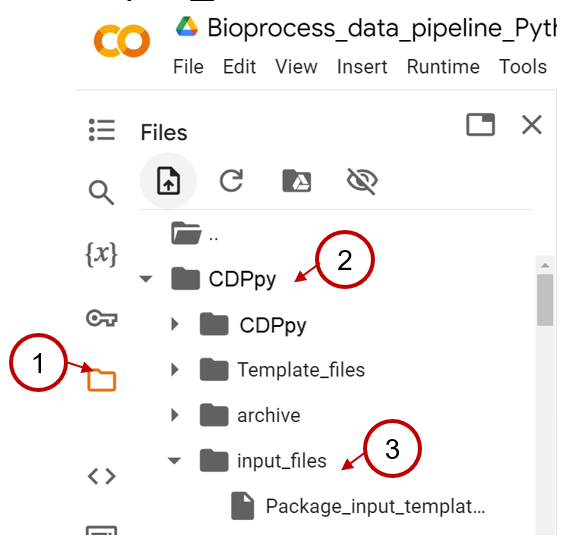


## 2.2 Specify data information
💡 When using your own dataset, remember to parameters that store data infomrmation of cell line in `FedBatchParameters` function:
1. `cell_line_name`: input the name of the cell line required for analysis. Naming should be consistent with the input excel file.
2. `use_concentration_after_feed`: input `True` if there are measurements on concentrations after feeding, otherwise, `False`.
3. `use_feed_concentration`: input `True` if feeding composition is known, otherwise, `False`.

In [10]:
# import required buit-in functions from package
from CDPpy.helper import input_path
from CDPpy import FedBatchCellCulture, FedBatchParameters

# Specify parameters that store data infomrmation for cell line 1 (CL1)
param_1 = FedBatchParameters(
          # input the cell line name, be consistent with the input excel file
          cell_line_name='CL1',
          # input "True" if there are measurements on concentrations after feeding, otherwise, "False"
          use_concentration_after_feed=False,
          # input "True" if feeding composition is known, otherwise, "False"
          use_feed_concentration=True)


# check/printout the data processing setting
param_1

Cell Line: CL1
Feed concentration will be used: True
Concentration after feeding will be used: False
Regression Methods
     Polynomial: True
     Rolling window polynomial True

# 2.2 Data processing
💡 If you change the input filename, change the filename in `input_path()` function.

In [12]:
# create a Python object to preform the data processing of CL1
cell_line_1= FedBatchCellCulture()

# define path to the input data file. Change the filename if needed.
path = input_path('Package_input_Example.xlsx')

# load the data set to the data-processing object
cell_line_1.load_data(file=path)

# peform data processsing with specified data information.
cell_line_1.perform_data_process(parameters=[param_1])

# 2.3 Export processed dataset to an Excel sheet

In [4]:
cell_line_1.save_excel(file_name='output_CL1.xlsx')


output_CL1.xlsx  saved.


<a name="multi-CLs"></a>
# 3. Step-by-step to processing datasets from multiple cell lines
💡 When having multiple cell lines, specify parametes that store data infomrmation for each cell line, and pass the different parameters (`param_1` and `param_2` in the example) to the `perform_data_process` function.

In [18]:
# Specify parameters that store data infomrmation for cell line 1 (CL1)
param_1 = FedBatchParameters(
          # input the cell line name, be consistent with the input excel file
          cell_line_name='CL1',
          # input "True" if there are measurements on concentrations after feeding, otherwise, "False"
          use_concentration_after_feed=False,
          # input "True" if feeding composition is known, otherwise, "False"
          use_feed_concentration=True)

# Specify parameters that store data infomrmation for cell line 2 (CL2)
param_2 = FedBatchParameters(
          # input the cell line name, be consistent with the input excel file
          cell_line_name='CL2',
          # input "True" if there are measurements on concentrations after feeding, otherwise, "False"
          use_concentration_after_feed=False,
          # input "True" if feeding composition is known, otherwise, "False"
          use_feed_concentration=True)


### Repeat section 2.2
# create a Python object to preform the data processing of CL1/2
cell_line_1_2= FedBatchCellCulture()

# define path to the input data file. Change the filename if needed.
path = input_path('Package_input_Example.xlsx')

# load the data set to the data-processing object
cell_line_1_2.load_data(file=path)

# peform data processsing with specified parameters that store data infomrmation.
# pass different data information with separate input params
cell_line_1_2.perform_data_process(parameters=[param_1, param_2])

# export the processed dataset
cell_line_1_2.save_excel(file_name='output_CL1_2.xlsx')

output_CL1_2.xlsx  saved.


<a name="plots"></a>
# 4. Interactive plot
💡 This interactive plot allows you to quickly compare and analyze process profiles among cell lines and experiments.

In [19]:
# call out the interactive plot, change the port number if an error mesaage raises
cell_line_1_2.interactive_plot(port=8015)

<IPython.core.display.Javascript object>